# PROJECT 2: WRANGLE AND ANALYZE DATA by Oluwashina Dedenuola

**The goal of this project is to collect data from various sources and formats, assess its quality and tidiness, clean it using data wrangling and create visualizations to gain insight.**

### Import python packages

In [523]:
#importing neccessary python packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


### Gathering the Datasets

In this stage, I will gather the datasets from multiple sources. For the image prediction dataset, I will  load the data using the get request function, while for the twitter archive and tweet json dataset, I'll use the pandas library to import and load the data.

***Importing the Image Prediction Data***

In [524]:
#load the image prediction data. 
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [525]:
#denoting the dataset as df_impredict.
df_impredict = pd.read_csv("image-predictions.tsv", sep = '\t')

***Importing the Tweet Json Data***

In [526]:
tweets= pd.read_json('tweet-json (1).txt', lines =True)

***Importing the Twitter Archive Data***

In [527]:
twitter_arc = pd.read_csv("twitter-archive-enhanced-2 (3).csv")


### Assesing the Datasets

At this stage of the analysis, the goal is to assess the data to have an understanding of the datasets and also look out for outliers, null values, errors etc that can impact the quality of the analysis. More importantly, to also identify areas that requires cleaning. I am going to carry out this stage of the analysis visually and programmatically.

***Assessing the Tweet Json Data***

In [528]:
tweets.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [529]:
#Using the info function to have a summary of the datatype of the tweet json dataset, possible null values and column and row features.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [530]:
#viewing the summary of the data statistically.
tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [531]:
#Checking the last few rows of the tweet json dataset.

tweets.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [532]:
#Random selection of rows from the tweet json data.
tweets.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
676,2016-10-21 01:42:53+00:00,789280767834746880,789280767834746880,RT @dog_rates: This is Meyer. He has to hold s...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Wed Jul 06 15:54:42 +0000 2016...,NaN,NaN,NaN
701,2016-10-12 02:53:11+00:00,786036967502913536,786036967502913536,RT @dog_rates: This is Scout. He really wants ...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 779834320894713856, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Sun Sep 25 00:06:08 +0000 2016...,NaN,NaN,NaN
807,2016-09-02 18:03:10+00:00,771770456517009408,771770456517009408,This is Davey. He'll have your daughter home b...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 771770449999097856, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,13356,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
143,2017-05-15 00:02:33+00:00,863907417377173506,863907417377173504,This is Albus. He's quite impressive at hide a...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 863907404156518400, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21477,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
641,2016-10-31 22:00:04+00:00,793210959003287553,793210959003287552,This is Maude. She's the h*ckin happiest wasp ...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 793210952363732998, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9997,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
452,2017-01-09 22:42:41+00:00,818588835076603904,818588835076603904,RT @dog_rates: This is Chelsea. She forgot how...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 773547591439122432, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Wed Sep 07 15:44:53 +0000 2016...,NaN,NaN,NaN
1911,2015-12-08 23:36:44+00:00,674372068062928900,674372068062928896,Meet Chesney. On the outside he stays calm &am...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674372059363983360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,931,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
829,2016-08-25 00:43:02+00:00,768609597686943744,768609597686943744,This is Lou. His sweater is too small and he a...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 768609590535680000, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4580,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1930,2015-12-08 00:37:11+00:00,674024893172875264,674024893172875264,When you realize it doesn't matter how hard yo...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674024888533966848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1914,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1420,2016-02-12 16:16:41+00:00,698178924120031232,698178924120031232,This is Lily. She accidentally dropped all her...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698178914674458625, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3084,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


There are missing values in the tweet json data.

***Assessing the Twitter Archive Data***

For the Twitter Archive file, I will be applying the following codes to study the data and record observations.

In [533]:
#Checking the first few rows of the twitter archive dataset.
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [534]:
#Information about the tweet json dataset's datatype, null values, and column and row features can be obtained by using the info function.
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [535]:
#checking unique values of the twitter archive dataset
twitter_arc.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [536]:
#checking the counts of the rating numerator
twitter_arc.value_counts('rating_numerator')

rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
420       2
75        2
0         2
15        2
666       1
960       1
204       1
182       1
165       1
144       1
143       1
88        1
121       1
99        1
27        1
84        1
80        1
60        1
50        1
45        1
44        1
26        1
24        1
20        1
17        1
1776      1
dtype: int64

In [537]:
#checking the counts of the rating denominator

twitter_arc.value_counts('rating_denominator')

rating_denominator
10     2333
50        3
11        3
80        2
20        2
150       1
130       1
120       1
110       1
90        1
0         1
70        1
2         1
40        1
16        1
15        1
7         1
170       1
dtype: int64

In [538]:
#Selecting rows at random from the tweet json data.
twitter_arc.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
1989,672828477930868736,NaN,NaN,2015-12-04 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a Timbuk Slytherin. Eats h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672828477...,9,10,Jerry,None,None,None,None
734,781251288990355457,NaN,NaN,2016-09-28 21:56:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He just got yelled at for goin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781251288...,11,10,Oakley,None,None,None,None
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,None,None,None
1328,705970349788291072,NaN,NaN,2016-03-05 04:17:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Venetian Kerploof. Suppo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705970349...,12,10,Lucy,None,None,None,None
856,764259802650378240,NaN,NaN,2016-08-13 00:38:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kota and her son Benedict. She doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764259802...,10,10,Kota,None,None,None,None
445,819227688460238848,NaN,NaN,2017-01-11 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,None,None,None,None
1600,686007916130873345,NaN,NaN,2016-01-10 02:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper has a magical eye. 11/10 I can't s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916...,11,10,None,None,None,pupper,None
1552,688916208532455424,NaN,NaN,2016-01-18 02:49:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants to say hello. 11/10 wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688916208...,11,10,None,None,None,pupper,None
213,851591660324737024,NaN,NaN,2017-04-11 00:24:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh jeez u did me quite the spook little fella....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851591660...,11,10,None,None,None,None,None


In [539]:
twitter_arc.name.value_counts()


None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [540]:
twitter_arc.name.nunique

<bound method IndexOpsMixin.nunique of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object>

In [541]:
#testing to ensure the dataset has been imported successfully.
df_impredict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [542]:
#Checking the last few rows of the tweet json dataset.
df_impredict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [543]:
df_impredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are no missing values in the image prediction data values

In [544]:
#Taking a random sampling of the image prediciton dataset.
df_impredict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1298,752334515931054080,https://pbs.twimg.com/ext_tw_video_thumb/75233...,1,Bedlington_terrier,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True
1012,709519240576036864,https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg,1,cocker_spaniel,0.414982,True,Newfoundland,0.225482,True,flat-coated_retriever,0.196789,True
498,675820929667219457,https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg,1,basset,0.556373,True,beagle,0.201675,True,bloodhound,0.110848,True
965,706265994973601792,https://pbs.twimg.com/media/Cc0pLU0WAAEfGEw.jpg,1,papillon,0.743715,True,Pekinese,0.114042,True,Saint_Bernard,0.047715,True
1234,746369468511756288,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,German_shepherd,0.622957,True,malinois,0.338884,True,wallaby,0.024161,False
763,688908934925697024,https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg,1,crane,0.158859,False,pier,0.130016,False,bell_cote,0.087741,False
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
1379,764857477905154048,https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg,1,Bernese_mountain_dog,0.792059,True,Appenzeller,0.155034,True,EntleBucher,0.038374,True
1589,798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
1553,793165685325201412,https://pbs.twimg.com/media/CwHj-jGWAAAnsny.jpg,1,golden_retriever,0.946224,True,Labrador_retriever,0.036477,True,doormat,0.002353,False


In [545]:
#Trying to find duplicate tables across the datasets.

all_columns = pd.Series(list(twitter_arc) + list(tweets) + list(df_impredict))
all_columns[all_columns.duplicated()]

25                   source
26    in_reply_to_status_id
28      in_reply_to_user_id
48                 tweet_id
dtype: object

There are duplicates rows in the tweet json dataset. I want to further assess the dataset to visualize the duplicates programatically

In [546]:
#assessing the duplicate rows in the tweet json dataset.
tweets[tweets.in_reply_to_status_id.duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [547]:
#assessing the duplicate rows in the tweet json dataset.
tweets[tweets.in_reply_to_user_id.duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [548]:
#assessing the duplicate rows in the tweet json dataset.
tweets[tweets.source.duplicated()] 

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Observations

**The following issues were identifed in the Image Prediction, Tweet Json and Twitter Archive Datasets. This issues are divided into Quality and Tidyness Issues and needs to be fixed reasonably before visualization. This takes us to cleaning of the dataset.**

***Issues***

**Quality**
1. Date Timestamp Conversion and renaming the column as Date

2. Tweet Id should be strings instead of integer in the three(3) datasets

3. Irregularities in the name assigned to the dogs.

4. remove retweeted rows

5. Removing columns not needed for analyis in the twitter dataset

6. merging the dog breed into a single column

7. Missing values & irrelevant columns for analysis in the tweet json data.

8. remove missing values & irrelevant columns not needed for analysis in the image prediction data

9. The rating denominator column has values > 10, Ideally they should be less or equal to 10.

10. Dog breeds are not in title case. 

11. Rating Numerator not correctly extracted.

**Tidyness**

1. All dog stage in different columns would be extracted into a single column

2. all three datasets would be merged into a single dataset


### Cleaning Data

In the cleaning phase of this analysis, the issues identified in the assessing stage is then addressed and resolved with the use of pandas/numpy functions. The goal of this data cleaning is to enhance the quality of the data to gain insight and for visualization purposes. There are instances where some of the issues identified were cleaned in a single line of code.

First step is to create a copy of the three(3) datasets

In [549]:
df_impredict = df_impredict.copy()
twitter_arc = twitter_arc.copy()
tweets = tweets.copy()

**Quality**

**1. Date Timestamp Conversion and renaming the column as Date**

**Define**

The Date Timestamp in the twitter archive is in object format whereas it should be in string format.Hence I will use a function to convert. 

**Code**

In [550]:
def d_twitter_arc(x):
    output = pd.to_datetime(x)
    return output
twitter_arc['timestamp'] = d_twitter_arc(x = twitter_arc['timestamp'])

In [551]:
twitter_arc.rename(columns = {'timestamp' : 'date'}, inplace = True)

**Test**

In [552]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   date                        2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**2. Tweet Id should be strings instead of integer in the three(3) datasets.**


**Define**

The most correct way to store the Tweet Id for the sake of this project should be as strings. I'll be using the astype method to convert the formatting.

**Code & Test**

In [553]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [554]:
tweets['id'] = tweets['id'].astype(str)
print (tweets.dtypes)

created_at                       datetime64[ns, UTC]
id                                            object
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

**Code & Test**

In [555]:
df_impredict['tweet_id'] = df_impredict['tweet_id'].astype(str)
print (df_impredict.dtypes)

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


**Code & Test**

In [556]:
twitter_arc['tweet_id'] = twitter_arc['tweet_id'].astype(str)
print (twitter_arc.dtypes)

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
date                          datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object


**3. Irregularities in the name assigned to the dogs**


replacing none, a, the, my and just with noname

#### code

In [557]:
twitter_arc.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [558]:
twitter_arc.name = twitter_arc.name.replace(['None','a','the','my', 'june'], 'NoName')

#### Test

In [559]:
twitter_arc.name.value_counts()

NoName        809
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Meatball        1
Chase           1
Lili            1
Rorie           1
Christoper      1
Name: name, Length: 954, dtype: int64

**4. Remove retweeted rows.**

##### code

In [560]:
twitter_arc = twitter_arc[pd.isnull(twitter_arc.retweeted_status_id)]

In [561]:
twitter_arc = twitter_arc[pd.isnull(twitter_arc.in_reply_to_status_id)]

##### test

In [562]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   date                        2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

**5. Removing columns not needed for analyis in the twitter dataset**


**Define**

The columns with missing and duplicate values in some of the image prediction dataset columms wouldn't be needed for analysis/visualization so it's best to drop those columns.

**Code**

In [563]:
twitter_arc.drop(['in_reply_to_user_id','source','retweeted_status_id','in_reply_to_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], inplace=True, axis ='columns') 

**Test**

In [564]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   date                2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 180.2+ KB


#### 6 merging the dog breed into a single column

I merged the three dog breeds column into a single column.

#### code

In [565]:
dog_breed = []
drop =[]

for v in df_impredict.index:
    if df_impredict.p1_dog.loc[v]:
        dog_breed += [df_impredict.p1.loc[v]]
    elif df_impredict.p2_dog.loc[v]:
        dog_breed += [df_impredict.p2.loc[v]]
    elif df_impredict.p3_dog.loc[v]:    
        dog_breed += [df_impredict.p3.loc[v]]
    else:
        drop += [v]
        
df_impredict.drop(index = drop, inplace = True)   
df_impredict.insert(4,"breed", dog_breed, False) 

#### test

In [566]:
df_impredict.breed.value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: breed, Length: 113, dtype: int64

**7. remove missing values & irrelevant columns for analysis in the tweet json data.**

**Define**

The columns with missing and duplicate values in their columms wouldn't be needed for analysis/visualization so it's best to drop those columns.

**Code**

In [567]:
tweets.drop(['created_at','is_quote_status','extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'possibly_sensitive','possibly_sensitive_appealable','lang','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','id_str','full_text','truncated','display_text_range','entities','source','user','favorited','retweeted' ],inplace = True, axis ='columns') 

**Test**

In [568]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


**8. remove missing values & irrelevant columns not needed for analysis in the image prediction data.**

**Define**

The image prediction dataset has no missing values but the columns not required for analysis would be dropped, columns such as the p1.

**code**

In [569]:
df_impredict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   breed     1751 non-null   object 
 5   p1_conf   1751 non-null   float64
 6   p1_dog    1751 non-null   bool   
 7   p2        1751 non-null   object 
 8   p2_conf   1751 non-null   float64
 9   p2_dog    1751 non-null   bool   
 10  p3        1751 non-null   object 
 11  p3_conf   1751 non-null   float64
 12  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 155.6+ KB


In [570]:
df_impredict = df_impredict.drop([ 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','p1'], axis = 1)

**Test**

In [571]:
df_impredict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1751 non-null   object
 1   jpg_url   1751 non-null   object
 2   img_num   1751 non-null   int64 
 3   breed     1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


**9. Fix the inflated rating denominator values**


**Define**

The rating denominator column has values > 10, Ideally they should be equal to 10. Since they are not so many values not 10, I will equate all the values in the column to 10.

**Code**

In [572]:
twitter_arc.value_counts('rating_denominator')

rating_denominator
10     2080
50        3
11        2
80        2
2         1
7         1
20        1
40        1
70        1
90        1
110       1
120       1
150       1
170       1
dtype: int64

In [573]:
twitter_arc.loc[:,'rating_denominator'] = '10'

**Test**

In [574]:
twitter_arc.value_counts('rating_denominator')

rating_denominator
10    2097
dtype: int64

**10. Dog breeds not in Title case.** 


**Define** 

Ideally, Dog breed names are meant to be in Title case, while even though,they are encapsulated as strings, the underscore within the Dog breed names can be removed.

**Code**

In [575]:
df_impredict['breed']= df_impredict['breed'].astype(str)

In [576]:
df_impredict.value_counts('breed')

breed
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Irish_wolfhound           1
standard_schnauzer        1
EntleBucher               1
Bouvier_des_Flandres      1
Scotch_terrier            1
Length: 113, dtype: int64

In [577]:
df_impredict["breed"]= df_impredict["breed"].str.title()
df_impredict.value_counts("breed")

breed
Golden_Retriever        173
Labrador_Retriever      113
Pembroke                 96
Chihuahua                95
Pug                      65
                       ... 
Bouvier_Des_Flandres      1
Standard_Schnauzer        1
Japanese_Spaniel          1
Silky_Terrier             1
Entlebucher               1
Length: 113, dtype: int64

In [578]:
df_impredict['breed'] = df_impredict['breed'].str.replace(r'_', ' ')


**Test**

In [579]:
df_impredict.value_counts("breed")

breed
Golden Retriever        173
Labrador Retriever      113
Pembroke                 96
Chihuahua                95
Pug                      65
                       ... 
Bouvier Des Flandres      1
Standard Schnauzer        1
Japanese Spaniel          1
Silky Terrier             1
Entlebucher               1
Length: 113, dtype: int64

**11. Some of the rating numerators are not correctly extracted. For instance, 9.75 is extracted as 75.**


**Define**

**In the rating numerator column, 9.75 is extracted as 75.**

**Code**


In [580]:
twitter_arc['rating_numerator']= twitter_arc['rating_numerator'].astype(int)

In [581]:
twitter_arc.rating_numerator = twitter_arc.rating_numerator.replace(75, 9.75)

**Test**

In [582]:
# it should return empty values
twitter_arc[twitter_arc.rating_numerator == 75]

,tweet_id,date,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Tidyness**

**Define**

1. Column length in the (3) three datasets have variation in their shapes especially row length. While I need to merge some of the datasets into a single column, this might lead to irregularities in the new dataframe to be created. In order to avoid this, I have to merge the lengthier datasets with the dataset with minimum row length.

In [583]:
tweets.shape

(2354, 3)

In [584]:
df_impredict.shape

(1751, 4)

In [585]:
twitter_arc.shape

(2097, 10)

In [586]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [587]:
#remaning the id column in tweets_df to tweet_id, so it matches with the other dataframes
tweets = tweets.rename(columns = {'id' : 'tweet_id'})
tweets.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [588]:
df_impredict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1751 non-null   object
 1   jpg_url   1751 non-null   object
 2   img_num   1751 non-null   int64 
 3   breed     1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


In [589]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   date                2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   float64            
 4   rating_denominator  2097 non-null   object             
 5   name                2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 180.2+ KB


**Code**

In [590]:
#merging two(2) datasets together to form a single dataset.
merged_weratedogs = pd.merge(twitter_arc,tweets)


**Test**

In [591]:
merged_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   date                2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   float64            
 4   rating_denominator  2097 non-null   object             
 5   name                2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
 10  retweet_count       2097 non-null   int64              
 11  favorite_count      2097 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64

**Code**

In [592]:
merged_new = pd.merge(merged_weratedogs, df_impredict)

**Test**

In [593]:
merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   object             
 1   date                1666 non-null   datetime64[ns, UTC]
 2   text                1666 non-null   object             
 3   rating_numerator    1666 non-null   float64            
 4   rating_denominator  1666 non-null   object             
 5   name                1666 non-null   object             
 6   doggo               1666 non-null   object             
 7   floofer             1666 non-null   object             
 8   pupper              1666 non-null   object             
 9   puppo               1666 non-null   object             
 10  retweet_count       1666 non-null   int64              
 11  favorite_count      1666 non-null   int64              
 12  jpg_url             1666 non-null 

In [594]:
merged_new.sample(20)

,tweet_id,date,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,breed
999,696900204696625153,2016-02-09 03:35:31+00:00,This is Rosie. She's a Benebark Cumberpatch. S...,12.0,10,Rosie,None,None,None,None,1156,3492,https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg,1,Chihuahua
976,698989035503689728,2016-02-14 21:55:47+00:00,This is Oliver. He does toe touches in his sle...,13.0,10,Oliver,None,None,None,None,1113,3701,https://pbs.twimg.com/media/CbNO0DaW0AARcki.jpg,1,Norfolk Terrier
1272,676582956622721024,2015-12-15 02:02:01+00:00,Meet Vinnie. He's having fun while being safe....,8.0,10,Vinnie,None,None,None,None,312,1310,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,Boston Bull
1130,684481074559381504,2016-01-05 21:06:19+00:00,Meet Pippa. She's an Elfin High Feta. Compact ...,10.0,10,Pippa,None,None,None,None,1320,4249,https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg,1,Chihuahua
927,704364645503647744,2016-02-29 17:56:32+00:00,Say hello to Bisquick. He's a Beneplop Cumbers...,12.0,10,Bisquick,None,None,None,None,3999,8804,https://pbs.twimg.com/media/CcZn6RWWIAAmOZG.jpg,1,Pembroke
99,866686824827068416,2017-05-22 16:06:55+00:00,This is Lili. She can't believe you betrayed h...,12.0,10,Lili,None,None,None,None,3727,20070,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,Flat-Coated Retriever
1064,689905486972461056,2016-01-20 20:21:00+00:00,Say hello to Gizmo. He's quite the pupper. Con...,11.0,10,Gizmo,None,None,pupper,None,787,2651,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian
828,714957620017307648,2016-03-29 23:29:14+00:00,This is Curtis. He's an Albino Haberdasher. Te...,10.0,10,Curtis,None,None,None,None,1595,4503,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great Pyrenees
838,713177543487135744,2016-03-25 01:35:51+00:00,This is Lance. Lance doesn't give a shit. 10/1...,10.0,10,Lance,None,None,None,None,3183,7854,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,1,Whippet
1376,673359818736984064,2015-12-06 04:34:25+00:00,This is Steve. He was just relaxing in hot tub...,8.0,10,Steve,None,None,None,None,728,1558,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English Setter


In [595]:
merged_new.isnull()

,tweet_id,date,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,breed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1662,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1663,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1664,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 2. The various dog stages(doggo, pupper, floofer and puppo) are in different columns, a new column called dog stage would be created and the various dog stages would be filled on the new column

In [596]:
merged_new.loc[(merged_new[['doggo','pupper','puppo','floofer']] != 'None').sum(axis = 1)> 1]

,tweet_id,date,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,breed
132,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13.0,10,NoName,doggo,None,None,puppo,19196,47844,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,Flat-Coated Retriever
138,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",11.0,10,NoName,doggo,floofer,None,None,3433,17169,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English Springer
303,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",13.0,10,Dido,doggo,None,pupper,None,3084,11901,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1,Curly-Coated Retriever
357,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,12.0,10,NoName,doggo,None,pupper,None,2525,9701,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,Golden Retriever
379,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,12.0,10,Bones,doggo,None,pupper,None,2429,8992,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,Dalmatian
579,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12.0,10,Maggie,doggo,None,pupper,None,2173,6620,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,Golden Retriever
625,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,5.0,10,NoName,doggo,None,pupper,None,1265,4849,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,Dalmatian
701,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious af. 12/10 for ...,12.0,10,just,doggo,None,pupper,None,3520,10342,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,Golden Retriever
742,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 1...",12.0,10,NoName,doggo,None,pupper,None,17621,44619,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,Golden Retriever


In [597]:
#merging dog stages into a column
merged_new['dog_stage'] = merged_new[['pupper','doggo','floofer','puppo']].apply(lambda x:','.join(x.astype(str)), axis = 1)

In [598]:
merged_new.dog_stage.value_counts()

None,None,None,None        1409
pupper,None,None,None       166
None,doggo,None,None         54
None,None,None,puppo         21
None,None,floofer,None        7
pupper,doggo,None,None        7
None,doggo,None,puppo         1
None,doggo,floofer,None       1
Name: dog_stage, dtype: int64

In [599]:
#removing None from the column
merged_new.dog_stage = merged_new.dog_stage.str.replace('None,',repl =  '')

In [600]:
merged_new.dog_stage = merged_new.dog_stage.str.replace(',None',repl =  '')

In [601]:
#checking the dog stage counts
merged_new.dog_stage.value_counts()

None             1409
pupper            166
doggo              54
puppo              21
floofer             7
pupper,doggo        7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [602]:
merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   object             
 1   date                1666 non-null   datetime64[ns, UTC]
 2   text                1666 non-null   object             
 3   rating_numerator    1666 non-null   float64            
 4   rating_denominator  1666 non-null   object             
 5   name                1666 non-null   object             
 6   doggo               1666 non-null   object             
 7   floofer             1666 non-null   object             
 8   pupper              1666 non-null   object             
 9   puppo               1666 non-null   object             
 10  retweet_count       1666 non-null   int64              
 11  favorite_count      1666 non-null   int64              
 12  jpg_url             1666 non-null 

Creating a new dataframe to select only required columns for visualization

In [603]:
merged_new.columns

Index(['tweet_id', 'date', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'breed', 'dog_stage'],
      dtype='object')

In [604]:
weratedog_df = merged_new[['tweet_id', 'date', 'breed', 'name','retweet_count', 'favorite_count', 'jpg_url', 'dog_stage']]

In [605]:
weratedog_df.head(2)

,tweet_id,date,breed,name,retweet_count,favorite_count,jpg_url,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,Chihuahua,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,None
1,891815181378084864,2017-07-31 00:18:03+00:00,Chihuahua,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,None


## Storing the cleaned dataset

After cleaning the dataset, I'll create a new dataset that combines all the datasets together as twitter_archive_master.csv

In [606]:
weratedog_df.to_csv('twitter_archive_master.csv',encoding = 'utf-8' ,index = False)

## Analyzing and Visualizing Data

In this section, i will analyze and visualize the wrangled master dataset.
I would also be using a barplot to produce a visualiation and also provide some insight into my findings.

## Dog stages tweets engagment 

I would like to know which of the dog stage had the most favourite tweet count as well as the one with the highest retweets.

### favorite count

In [607]:
dogstageFcount= weratedog_df.groupby('dog_stage').favorite_count.sum().sort_values(ascending = False).reset_index()
dogstageFcount = dogstageFcount.iloc[1:]
dogstageFcount

,dog_stage,favorite_count
1,pupper,1259041
2,doggo,1047829
3,puppo,450614
4,"pupper,doggo",97024
5,floofer,92442
6,"doggo,puppo",47844
7,"doggo,floofer",17169


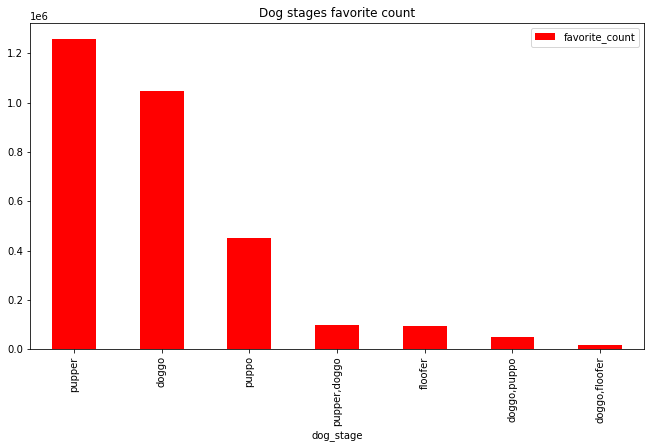

In [608]:
dogstageFcount.plot(x= 'dog_stage', y= 'favorite_count', kind = 'bar', figsize= (11,6), color = 'red').set_title("Dog stages favorite count")
plt.show()

### retweet count

In [609]:
dogstageRcount= weratedog_df.groupby('dog_stage').retweet_count.sum().sort_values(ascending = False).reset_index()
dogstageRcount = dogstageRcount.iloc[1:]
dogstageRcount

,dog_stage,retweet_count
1,pupper,405118
2,doggo,381233
3,puppo,133891
4,floofer,34781
5,"pupper,doggo",32617
6,"doggo,puppo",19196
7,"doggo,floofer",3433


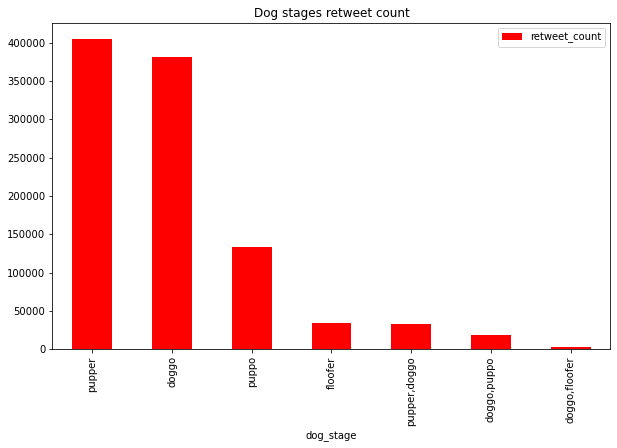

In [610]:
dogstageRcount.plot(x= 'dog_stage', y= 'retweet_count', kind = 'bar', figsize= (10,6), color = 'red').set_title("Dog stages retweet count")
plt.show()

pupper had the highest number of favourites while doggo had the highest number of retweet,while floofer had the least counts in favourite and retweet engagement

## Dog names tweet engagement

I'll like to know the dog names that reoccured the most, the dog names with the most favorites and retweets.

In [611]:
name = weratedog_df.name.value_counts().iloc[1:].reset_index()
name.head(5)

,index,name
0,Charlie,10
1,Cooper,10
2,Lucy,10
3,Oliver,9
4,Tucker,9


In [612]:
namefcount= weratedog_df.groupby('name').favorite_count.sum().sort_values(ascending = False).iloc[1:].reset_index()
namefcount.head(5)

,name,favorite_count
0,Bo,136148
1,Zoey,113581
2,Lucy,110523
3,Duddles,107956
4,Stephan,107015


In [613]:
namercount= weratedog_df.groupby('name').retweet_count.sum().sort_values(ascending = False).iloc[1:].reset_index()
namercount.head(5)

,name,retweet_count
0,Stephan,56625
1,Bo,54924
2,Duddles,45849
3,Buddy,37686
4,Lucy,35313


Another intriguing finding relates to the tweet engagements with the dog names. With a value of 10, I was able to identify the dog with the highest count or occurrence in the datasets as lucy, cooper and charlie.

According to insight regarding dog name favorite counts, the dog name Bo had a favorite count of 136148, while insight regarding dog name retweet counts revealed that the dog name Stephan had the highest retweet count of 56625.

Generally, the dog Bo seems to have the highest form of engagement on an average.

## Dog breed tweet engagement

Finally, which of the dog breeds has the highest form of engagement?

In [614]:
breed = weratedog_df.breed.value_counts().reset_index()
breed.head(5)

,index,breed
0,Golden Retriever,156
1,Labrador Retriever,106
2,Pembroke,94
3,Chihuahua,90
4,Pug,62


In [615]:
breedrcount= weratedog_df.groupby('breed').retweet_count.sum().sort_values(ascending = False).reset_index()
breedrcount.head(5)

,breed,retweet_count
0,Golden Retriever,586657
1,Labrador Retriever,405404
2,Pembroke,291771
3,Chihuahua,250722
4,Samoyed,203446


In [616]:
breedfcount= weratedog_df.groupby('breed').favorite_count.sum().sort_values(ascending = False).reset_index()
breedfcount.head(5)

,breed,favorite_count
0,Golden Retriever,1943782
1,Labrador Retriever,1265355
2,Pembroke,1038797
3,Chihuahua,743689
4,Samoyed,583906


The dog breed(Golden Retriever) happens to be the most sought after has it had the highest form of engagement in terms of the favourite tweets and retweets. 

The Labrador retriever also followed the Golden Retriever as the dog breed with the most retweet countd and favourite tweet count.

***Resources***

Please find the references to materials I used to complete this project.

https://www.geeksforgeeks.org/how-to-read-json-files-with-3pandas/#:~:text=Reading%20JSON%20Files%20using%20Pandas,and%20columns)%20that%20stores%20data.

https://stackoverflow.com/questions/20037430/reading-multiple-json-records-into-a-pandas-dataframe

https://towardsdatascience.com/data-quality-check-for-your-data-analysis-tutorial-with-pandas-7ee96d7dc4b6

https://datatofish.com/integers-to-strings-dataframe/
https://www.w3schools.com/python/pandas/ref_df_drop.asp#:~:text=The%20drop()%20method%20removes,method%20removes%20the%20specified%20row.
https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

https://www.folkstalk.com/2022/10/pandas-merge-multiple-dataframes-with-code-examples.html

https://sparkbyexamples.com/pandas/pandas-merge-two-dataframes-on-multiple-columns/

https://www.geeksforgeeks.org/python-pandas-series-str-lower-upper-and-title/

https://stackoverflow.com/questions/63920273/python-how-to-combine-multiple-if-else-statements

https://stackoverflow.com/questions/44723183/set-value-to-an-entire-column-of-a-pandas-dataframe

https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column

# THANK YOU.